### 1. Import the dataset using Pandas from above mentioned url.


In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"
df = pd.read_csv(url)


### 2. High Level Data Understanding:


### 2a. Find no. of rows & columns in the dataset


In [3]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Number of rows: 57394
Number of columns: 49


 ### 2b. Data types of columns.


In [4]:
print(df.dtypes)


iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

### 2c. c. Info & describe of data in dataframe.


In [7]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

### 3. Low Level Data Understanding :


 ### a. Find count of unique values in location column.


In [11]:
print(df["location"].nunique())


216


###  b. Find which continent has maximum frequency using values counts 


In [14]:
print(df["continent"].value_counts().idxmax())


Europe


 ### c. Find maximum & mean value in 'total_cases'.


In [17]:
print("Maximum value of total_cases:", df["total_cases"].max())
print("Mean value of total_cases:", df["total_cases"].mean())


Maximum value of total_cases: 55154651.0
Mean value of total_cases: 167797.3688753302


 ### d. Find 25%,50% & 75% quartile value in 'total_deaths'.


In [18]:
print(df["total_deaths"].quantile([0.25, 0.5, 0.75]))


0.25     13.0
0.50     84.0
0.75    727.0
Name: total_deaths, dtype: float64


 ### e. Find which continent has maximum 'human_development_index'.
 


In [19]:
print(df.loc[df["human_development_index"].idxmax()]["continent"])


Europe


###  f. Find which continent has minimum 'gdp_per_capita'.


In [20]:
print(df.loc[df["gdp_per_capita"].idxmin()]["continent"])


Africa


### 4.Filtering the dataframe with only these columns ['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index'] and updating the data frame:


In [33]:
cols = ['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index']
df = df[cols]
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


## 5. Data Cleaning


###  a. Remove all duplicates observations


In [35]:
df.drop_duplicates(inplace=True)
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
57389,NaN,International,13/11/20,696.0,7.0,NaN,NaN
57390,NaN,International,14/11/20,696.0,7.0,NaN,NaN
57391,NaN,International,15/11/20,696.0,7.0,NaN,NaN
57392,NaN,International,16/11/20,696.0,7.0,NaN,NaN


### b. Find missing values in all columns


In [36]:
print(df.isnull().sum())


continent                    646
location                       0
date                           0
total_cases                 3636
total_deaths               13026
gdp_per_capita              7027
human_development_index     8147
dtype: int64


 ### c. Remove all observations where continent column value is missing


In [37]:
df.dropna(subset=["continent"], inplace=True)
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,NaN,NaN,1803.987,0.498
1,Asia,Afghanistan,01/01/20,NaN,NaN,1803.987,0.498
2,Asia,Afghanistan,02/01/20,NaN,NaN,1803.987,0.498
3,Asia,Afghanistan,03/01/20,NaN,NaN,1803.987,0.498
4,Asia,Afghanistan,04/01/20,NaN,NaN,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,14/11/20,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,15/11/20,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,16/11/20,8786.0,257.0,1899.775,0.535


 ### d. Fill all missing values with 0


In [38]:
df.fillna(0, inplace=True)
df

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index
0,Asia,Afghanistan,31/12/19,0.0,0.0,1803.987,0.498
1,Asia,Afghanistan,01/01/20,0.0,0.0,1803.987,0.498
2,Asia,Afghanistan,02/01/20,0.0,0.0,1803.987,0.498
3,Asia,Afghanistan,03/01/20,0.0,0.0,1803.987,0.498
4,Asia,Afghanistan,04/01/20,0.0,0.0,1803.987,0.498
...,...,...,...,...,...,...,...
56743,Africa,Zimbabwe,13/11/20,8696.0,255.0,1899.775,0.535
56744,Africa,Zimbabwe,14/11/20,8765.0,257.0,1899.775,0.535
56745,Africa,Zimbabwe,15/11/20,8786.0,257.0,1899.775,0.535
56746,Africa,Zimbabwe,16/11/20,8786.0,257.0,1899.775,0.535


## 6. Date time format :


### a. Converting the date column to datetime format using pandas.to_datetime:


In [42]:
df["date"] = pd.to_datetime(df["date"])
df["date"]


0       2019-12-31
1       2020-01-01
2       2020-02-01
3       2020-03-01
4       2020-04-01
           ...    
56743   2020-11-13
56744   2020-11-14
56745   2020-11-15
56746   2020-11-16
56747   2020-11-17
Name: date, Length: 56748, dtype: datetime64[ns]

### b. Creating a new column month after extracting month data from the date column:



In [44]:
df["month"] = df["date"].dt.month
df["month"]


0        12
1         1
2         2
3         3
4         4
         ..
56743    11
56744    11
56745    11
56746    11
56747    11
Name: month, Length: 56748, dtype: int64

## 7. Data Aggregation:


### a. Finding the maximum value in all columns using groupby function on the 'continent' column:


In [46]:
df_groupby = df.groupby("continent").max().reset_index()
df_groupby

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


### b. Store the result in a new dataframe named 'df_groupby'.


In [47]:
df_groupby = df.groupby("continent").max().reset_index()
df_groupby

,continent,location,date,total_cases,total_deaths,gdp_per_capita,human_development_index,month
0,Africa,Zimbabwe,2020-12-11,752269.0,20314.0,26382.287,0.797,12
1,Asia,Yemen,2020-12-11,8874290.0,130519.0,116935.600,0.933,12
2,Europe,Vatican,2020-12-11,1991233.0,52147.0,94277.965,0.953,12
3,North America,United States Virgin Islands,2020-12-11,11205486.0,247220.0,54225.446,0.926,12
4,Oceania,Wallis and Futuna,2020-12-11,27750.0,907.0,44648.710,0.939,12
5,South America,Venezuela,2020-12-11,5876464.0,166014.0,22767.037,0.843,12


## 8. Feature Engineering :


### a. Creating a new feature 'total_deaths_to_total_cases' by the ratio of the 'total_deaths' column to 'total_cases':


In [52]:
df['total_deaths_to_total_cases'] = df['total_deaths'] / df['total_cases']
df['total_deaths_to_total_cases']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
56743    0.029324
56744    0.029321
56745    0.029251
56746    0.029251
56747    0.028886
Name: total_deaths_to_total_cases, Length: 56748, dtype: float64

## 9. Data Visualization :


### a. Perform Univariate analysis on 'gdp_per_capita' column by plotting


In [59]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.

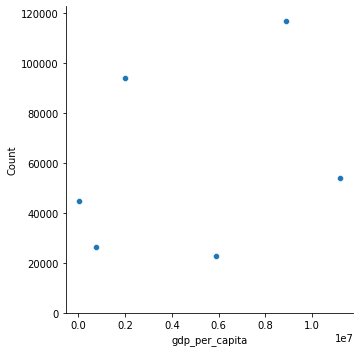

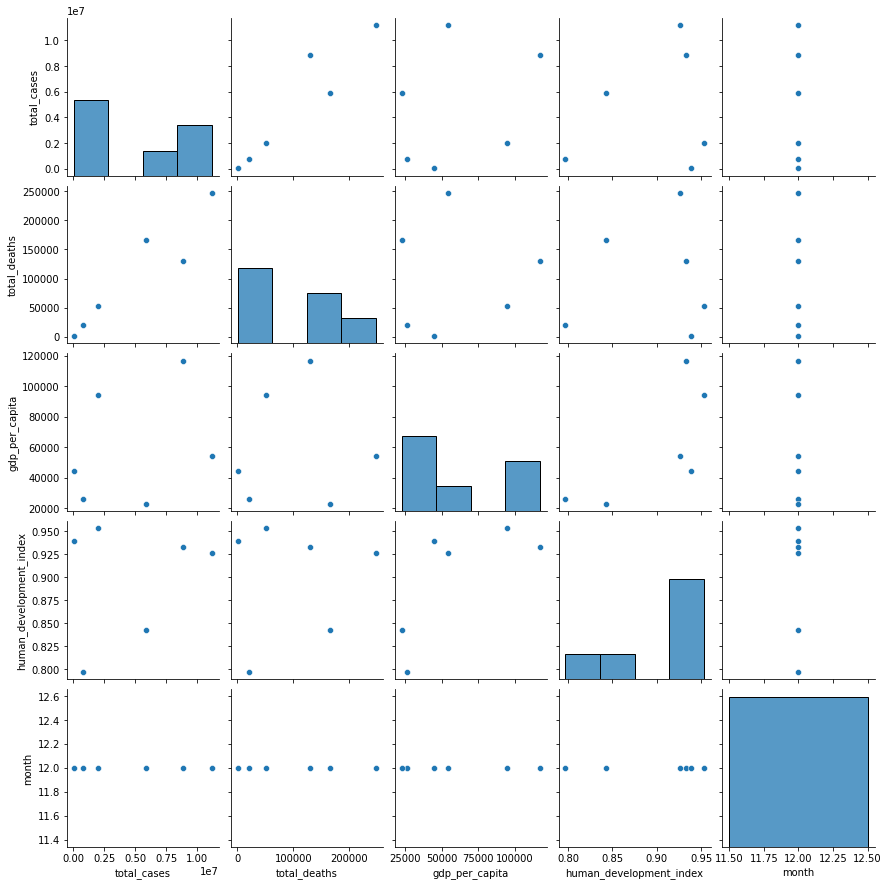

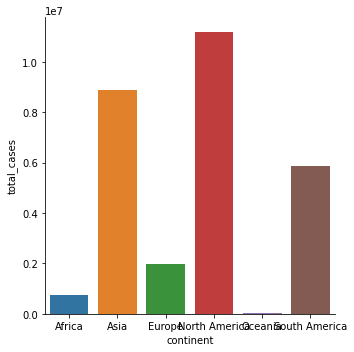

In [61]:
import seaborn as sns

# Univariate analysis on 'gdp_per_capita' column using dist plot
sns.displot(df_groupby, x="gdp_per_capita")

# Scatter plot of 'total_cases' & 'gdp_per_capita'
sns.scatterplot(data=df_groupby, x="total_cases", y="gdp_per_capita")

# Pairplot on df_groupby dataset
sns.pairplot(df_groupby)

# Bar plot of 'continent' column with 'total_cases'
sns.catplot(data=df_groupby, x="continent", y="total_cases", kind="bar")


 ### b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'above problem



<AxesSubplot: xlabel='gdp_per_capita', ylabel='total_cases'>

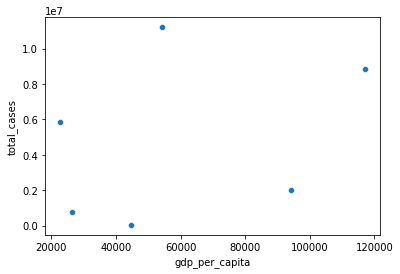

In [63]:
import seaborn as sns

sns.scatterplot(x='gdp_per_capita', y='total_cases', data=df_groupby)


### c. Plot Pairplot on df_groupby dataset.


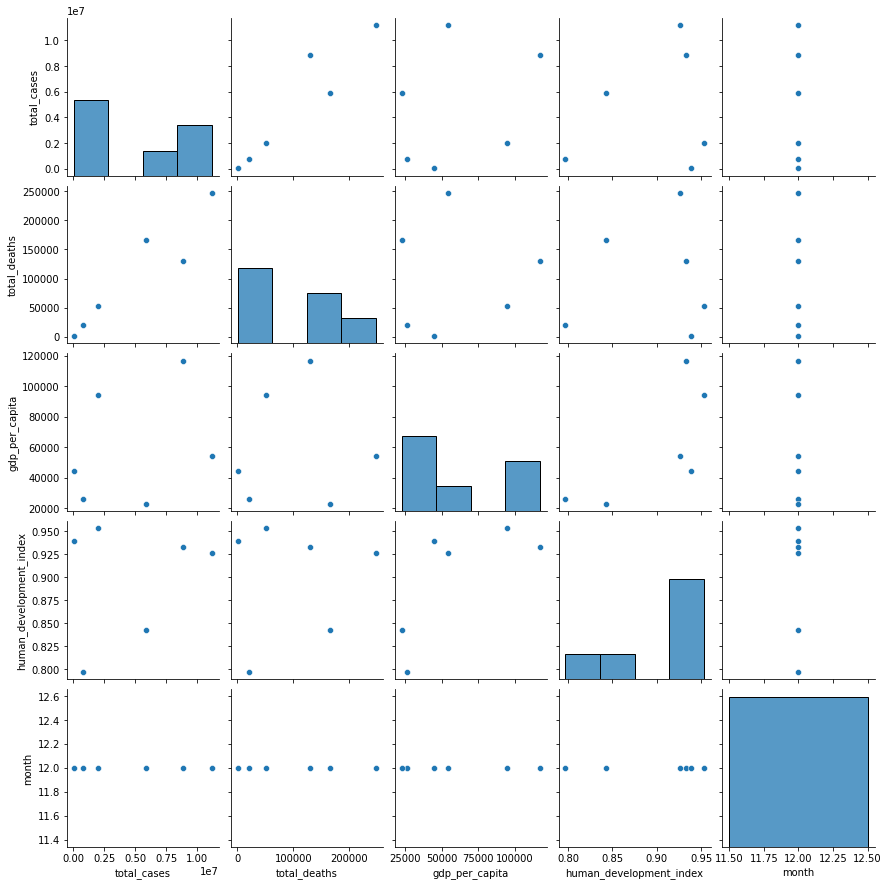

In [64]:
import seaborn as sns

sns.pairplot(df_groupby)


 ### d. Plot a bar plot of 'continent' column with 'total_cases' Tip : using kind='bar' in seaborn catplot


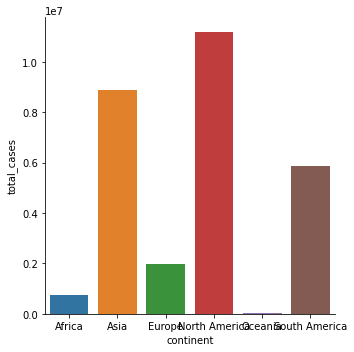

In [66]:
import seaborn as sns

sns.catplot(x="continent", y="total_cases", kind="bar", data=df_groupby)
